IP Simulation: Blocks Model
=======================

## Geoscientific Scenario

For this code comparison, pole-dipole induced polarization data were simulated over a conductive and chargeable block and over a resistive block. The background was non-chargeable and had a conductivity is $\sigma_0$ = 0.01 S/m. The conductive-chargeable block had a conductivity of $\sigma_c$ = 0.1 S/m and an intrinsic chargeability of $\eta_c$ = 0.1 V/V. The resistor was non-chargeable and had a conductivity of $\sigma_r$ = 0.001 S/m. Both blocks were oriented along the Northing direction and had x, y and z dimensions of 400 m, 1600 m and 320 m. Both blocks were buried at a depth of 160 m.

Apparent chargeability data were simulated with a pole-dipole configuration. The survey consisted of 9 West-East survey lines, each with a length of 2000 m. The line spacing was 250 m and the electrode spacing was 100 m.

## Codes/Formulations Being Compared

**SimPEG 3D Nodal Formulation:** This approach to solving the forward problem uses the *SimPEG.electromagnetics.static.simulation.Simulation3DNodal* simulation class.

**UBC-GIF DCIP OcTree:** [DCIP OcTree](https://dcipoctree.readthedocs.io/en/latest/) is a voxel cell DC/IP forward modeling and inversion package developed by the UBC Geophysical Inversion Facility. This software is proprietary and can ONLY be acquired through appropriate [commerical](https://gif.eos.ubc.ca/software/licenses_commercial) licenses. The numerical approach of the forward simulation is described in the [online manual's theory section](https://dcipoctree.readthedocs.io/en/latest/content/theory.html). If you have a valid license, there are instructions for reproducing the results (add link).

## Loading Assets Into the SimPEG Framework

We start by importing any necessary packages for running the notebook.

In [1]:
from SimPEG.electromagnetics.static import resistivity as dc
from SimPEG.electromagnetics.static.utils.static_utils import plot_3d_pseudosection, apparent_resistivity
from SimPEG.utils.io_utils import read_dcipoctree_ubc, write_dcipoctree_ubc
from discretize import TreeMesh
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import numpy as np

Next we download the mesh, model and simulated data for each code/formulation.

In [2]:
# For each package, download .tar files

The mesh, model and predicted data for each code are then loaded into the SimPEG framework for plotting.

In [3]:
rootdir = './../../../assets/dcip/block_model_ip_fwd_simpeg_octree/'
mesh_simpeg = TreeMesh.readUBC(rootdir+'octree_mesh.txt')
conductivity_model_simpeg = TreeMesh.readModelUBC(mesh_simpeg, rootdir+'true_model.con')
chargeability_model_simpeg = TreeMesh.readModelUBC(mesh_simpeg, rootdir+'true_model.chg')
data_simpeg = read_dcipoctree_ubc(rootdir+'dpred_simpeg.txt', 'apparent_chargeability')

rootdir = './../../../assets/dcip/block_model_ip_fwd_dcipoctree/'
mesh_ubc = TreeMesh.readUBC(rootdir+'octree_mesh.txt')
conductivity_model_ubc = TreeMesh.readModelUBC(mesh_simpeg, rootdir+'true_model.con')
chargeability_model_ubc = TreeMesh.readModelUBC(mesh_simpeg, rootdir+'true_model.chg')
data_ubc = read_dcipoctree_ubc(rootdir+'data_ip.txt', 'apparent_chargeability')

## Plot Geophysical Scenario

Below, we plot the density contrast model and survey geometry for the forward simulation.

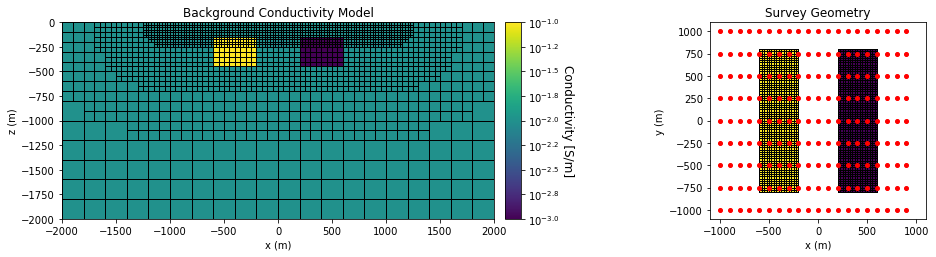

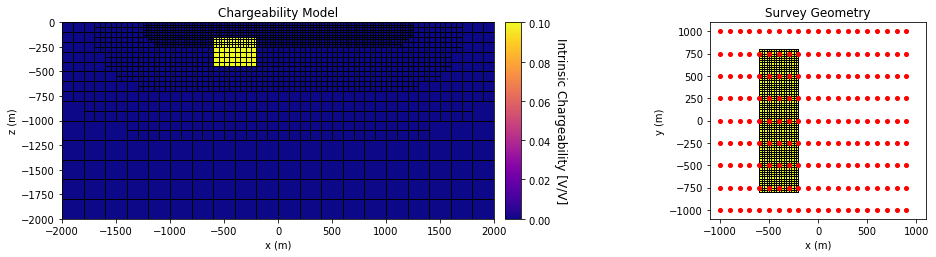

In [4]:
vmin = np.log10(conductivity_model_simpeg.min())
vmax = np.log10(conductivity_model_simpeg.max())
ind = int(len(mesh_simpeg.hy)/2)

fig = plt.figure(figsize=(15, 3.5))

ax1 = fig.add_axes([0.1, 0.12, 0.4, 0.78])
mesh_simpeg.plot_slice(
    np.log10(conductivity_model_simpeg), ax=ax1, normal='Y', grid=True,
    ind=ind, clim=(vmin, vmax), pcolorOpts={"cmap": "viridis"},
)
ax1.set_title("Background Conductivity Model")
ax1.set_xlim([-2000, 2000])
ax1.set_ylim([-2000, 0])
ax1.set_xlabel("x (m)")
ax1.set_ylabel("z (m)")

ax2 = fig.add_axes([0.51, 0.12, 0.015, 0.78])
norm = mpl.colors.Normalize(
    vmin=vmin, vmax=vmax
)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, cmap=mpl.cm.viridis, orientation="vertical", format="$10^{%.1f}$"
)
cbar.set_label("Conductivity [S/m]", rotation=270, labelpad=15, size=12)

ax3 = fig.add_axes([0.7, 0.12, 0.2, 0.78])
ind = int(len(mesh_simpeg.hz)-10)
masked_model = np.log10(conductivity_model_simpeg)
masked_model[masked_model==-2]=np.NaN
mesh_simpeg.plot_slice(
    masked_model, ax=ax3, normal='Z', grid=True,
    ind=ind, clim=(vmin, vmax), pcolorOpts={"cmap": "viridis"},
)
for ii in range(0, 9):
    ax3.plot(np.arange(-1000, 1000, 100), -1000+ii*250*np.ones(20), 'ro', markersize=4)
ax3.set_xlim([-1100, 1100])
ax3.set_ylim([-1100, 1100])
ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.set_title('Survey Geometry')

plt.show()


vmin = chargeability_model_simpeg.min()
vmax = chargeability_model_simpeg.max()
ind = int(len(mesh_simpeg.hy)/2)

fig = plt.figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0.1, 0.12, 0.4, 0.78])
mesh_simpeg.plot_slice(
    chargeability_model_simpeg, ax=ax1, normal='Y',grid=True, ind=ind,
    clim=(vmin, vmax), pcolorOpts={"cmap": "plasma"},
)
ax1.set_title("Chargeability Model")
ax1.set_xlim([-2000, 2000])
ax1.set_ylim([-2000, 0])
ax1.set_xlabel("x (m)")
ax1.set_ylabel("z (m)")

ax2 = fig.add_axes([0.51, 0.12, 0.015, 0.78])
norm = mpl.colors.Normalize(
    vmin=vmin, vmax=vmax
)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, cmap=mpl.cm.plasma, orientation="vertical", format="${%.2f}$"
)
cbar.set_label("Intrinsic Chargeability [V/V]", rotation=270, labelpad=15, size=12)

ax3 = fig.add_axes([0.7, 0.12, 0.2, 0.78])
ind = int(len(mesh_simpeg.hz)-10)
masked_model = chargeability_model_simpeg
masked_model[masked_model<0.1]=np.NaN
mesh_simpeg.plot_slice(
    masked_model, ax=ax3, normal='Z', grid=True,
    ind=ind, clim=(vmin, vmax), pcolorOpts={"cmap": "plasma"},
)
for ii in range(0, 9):
    ax3.plot(np.arange(-1000, 1000, 100), -1000+ii*250*np.ones(20), 'ro', markersize=4)
ax3.set_xlim([-1100, 1100])
ax3.set_ylim([-1100, 1100])
ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.set_title('Survey Geometry')

plt.show()

## Comparing Simulated Apparent Chargeability Data

Here we plot the simulated data for all codes.

In [5]:
mpl.rcParams.update({'font.size': 16})

plane_points = []
for x in np.arange(-1000, 1100, 500):
    p1, p2, p3 = np.array([-1000.,x,0]), np.array([1000,x,0]), np.array([1000,x,-1000])
    plane_points.append([p1,p2,p3])

scene_camera=dict(
    center=dict(x=-0.1, y=0, z=-0.2), eye=dict(x=1.2, y=-1, z=1.5)
)
scene = dict(
    xaxis=dict(range=[-1000, 1000]), yaxis=dict(range=[-1000, 1000]), zaxis=dict(range=[-500, 0]),
    aspectratio=dict(x=1, y=1, z=0.5)
)

vlim = [data_ubc.dobs.min(), data_ubc.dobs.max()]
fig1 = plot_3d_pseudosection(
    data_ubc.survey, data_ubc.dobs, scale='lin', vlim=vlim,
    plane_points=plane_points, plane_distance=10., units='V/V',
    marker_opts={"colorscale": "plasma"}
)
fig1.update_layout(
    title_text="Apparent Chargeability (UBC)", title_x=0.5, width=600, height=550, scene_camera=scene_camera, scene=scene
)
plotly.io.show(fig1)

vlim = [data_simpeg.dobs.min(), data_simpeg.dobs.max()]
fig2 = plot_3d_pseudosection(
    data_simpeg.survey, data_simpeg.dobs, marker_size=150, scale='lin', vlim=vlim,
    plane_points=plane_points, plane_distance=10., units='V/V',
    marker_opts={"colorscale": "plasma"}
)

fig2.update_layout(
    title_text="Apparent Chargeability (SimPEG)", title_x=0.5, width=600, height=550, scene_camera=scene_camera, scene=scene
)
plotly.io.show(fig2)

## Error Plot

Here we plot the error between the SimPEG and UBC-GIF formulations.

In [6]:
err = data_simpeg.dobs - data_ubc.dobs

vlim = [err.min(), err.max()]
fig = plot_3d_pseudosection(
    data_simpeg.survey, err, scale='linear', vlim=vlim,
    plane_points=plane_points, plane_distance=10., units='V/V'
)
fig.update_layout(
    title_text="Relative Error", title_x=0.5, width=600, height=550, scene_camera=scene_camera, scene=scene
)
plotly.io.show(fig)

print('Min error:', np.min(np.abs(err)))
print('Max error:', np.max(np.abs(err)))
print('Average error:', np.mean(np.abs(err)))
print('Median error:', np.median(np.abs(err)))

Min error: 1.663999999999854e-08
Max error: 0.002557669999999998
Average error: 0.0004932173611827957
Median error: 0.00029564949999999935
